In [1]:
import pandas as pd
import numpy as np
import pylab as plt
import networkx as nx


In [2]:
points_list = [(0,4),(4,0),(0,3),(3,0),(1,2),(2,1),(1,4),(4,1),
             (1,8),(8,1),(1,9),(9,1),(2,3),(3,2),(2,6),(6,2),
             (1,5),(5,1),(2,5),(5,2),(5,6),(6,5),(7,8),(8,7),
             (7,5),(5,7),(8,9),(9,8),(8,10),(10,8),(9,10),
             (10,9),(10,2),(2,10),(3,7),(7,3),(4,7),(7,4)]


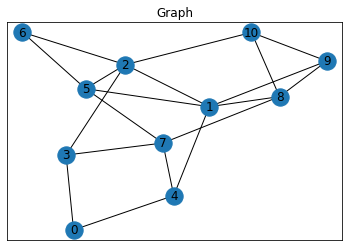

In [3]:
G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.title('Graph')
plt.show()

In [4]:
nodesNumber = G.number_of_nodes()         
gamma = 0.8
initial_state = 1

In [5]:
R = np.matrix(np.ones(shape = (nodesNumber, nodesNumber)))
R *=-1

gamma = 0.8
initial_state = 1

In [6]:
def available_actions(state):
    startingNode_row = R[state, ]
    av_act = np.where(startingNode_row >= 0)[1]
    return av_act

In [7]:
def sample_next_action(available_act):
    next_action = int(np.random.choice(available_act, 1))
    return next_action

In [8]:
def update(Q,startingNode, action, gamma):
	    
    max_index = np.where(Q[action,]==np.max(Q[action,]))[1]
    
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    
    max_value = Q[action, max_index]
    
    Q[startingNode, action] = R[startingNode, action] + gamma *max_value
    
    if np.max(Q > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)

In [9]:
def shortest_Path(origin,destination):
		
	for point in points_list:
	    if point[1] ==destination:
	        R[point] = 150
	    else:
	        R[point] = 0
	        
	    if point[0] == destination:
	        R[point[::-1]] = 150
	    else:
	        R[point[::-1]] = 0


	R[destination, destination] = 150

	Q = np.matrix(np.zeros([nodesNumber, nodesNumber]))
	
	available_act = available_actions(initial_state)
	action = sample_next_action(available_act)
	update(Q,initial_state, action, gamma)
	

	scores=[]
	for i in  range(nodesNumber*100):
	    startingNode = np.random.randint(0, int(Q.shape[0]))
	    available_act = available_actions(startingNode)
	    action = sample_next_action(available_act)
	    score = update(Q,startingNode, action, gamma)
	    scores.append(score)

	steps = [origin]
	current = origin
	while current != destination:
	    next_step_index = np.where(Q[current,]== np.max(Q[current,]))[1]
	    
	    if next_step_index.shape[0] > 1:
	        next_step_index = int(np.random.choice(next_step_index, size = 1))
	    else:
	        next_step_index = int(next_step_index)
	    
	    steps.append(next_step_index)
	    current = next_step_index

	return scores, steps



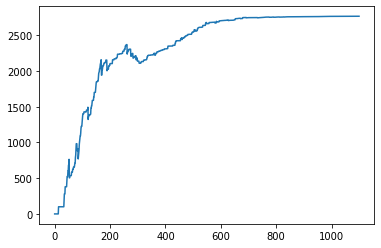

Best Route Based on Q Matrix:  [0, 3, 2, 10]


In [10]:
scores,steps = shortest_Path(0,10)
plt.plot(scores)
plt.show()
print('Best Route Based on Q Matrix: ',steps) 

In [15]:
## ACNOLEDGEMENT:
###    https://heartbeat.fritz.ai/automating-an-ai-to-find-the-shortest-route-using-reinforcement-learning-19dc9a3c0411
###    https://towardsdatascience.com/finding-shortest-path-using-q-learning-algorithm-1c1f39e89505